<a href="https://colab.research.google.com/github/Dhruv-Mahajan1/Signals-and-System-Assignment/blob/main/SNS_programming_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                                        #importing important libraries required 
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv")                           #readinf data from the data.csv file adn then printing first 5 rows of the data 
print(data.head())

      x[n]     y[n]
0  35.4312  33.3735
1  35.1511  34.3744
2  34.8284  35.7514
3  34.4656  35.5869
4  34.0656  36.0826


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


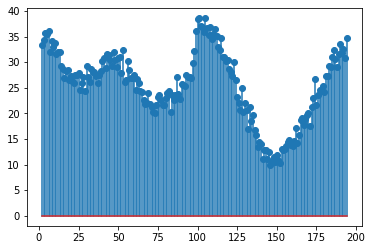

In [ ]:
x = np.linspace(2, 194,193)                     # this codeblock is used for printing the stem plot of the given signal y[n]
plt.stem(x, data['y[n]'], linefmt=None, markerfmt=None, basefmt=None)
plt.show()

####Denoising Function


In [ ]:
def denoising( raw_signal):              #defining function that will output a array that is denoised
  array1=np.array([raw_signal[0],raw_signal[0]])               #taking an array (array1) and initializing its first 2 elements  with first value present in the raw_signal(which is the parameter passed into the fuction)
  array1=np.concatenate((array1,raw_signal),axis=None)       #concatenating array1 and raw_signal 
  array1=np.append(array1,raw_signal[-1])                   #appending last value of raw_signal two times into array1
  array1=np.append(array1,raw_signal[-1])
  denoised_array=np.zeros(1)
  for i in range(2,len(array1)-2):                           #running a loop that will append averaged out values into an array 'denoised array'
    denoised_array=np.append(denoised_array,np.mean(array1[i-2:i+3]))    #kernel size is taken as 5
  denoised_array=np.delete(denoised_array,0)       
  return denoised_array    #returning denoised array

###Deblurring Function

In [ ]:
j=complex(0,1)  

def discrete_fourier_transform(s,w):            #defining discrete_fourier_transform fuction (using definition of dtft) which has 2 input parameters as signal(s) and omega(w)
    sum=0
    for i in range(0,len(s)):                  
      sum+=s[i]*np.exp(-i*j*w)
    return sum
def discrete_fourier_transform_for_h(sl,w):    #defining discrete_fourier_transform fuction which has 2 input parameters as signal(s) and omega(w)
    sum=0                                #  this is different from above because the center value of 6 /16 corresponds to n = 0)
    for i in range(0,len(sl)):
      sum+=sl[i]*np.exp(-(i-2)*j*w)
    return sum
def dtft(signal):
  answers=[]               #a list named anwsers that will store fourier transform of signal( which is the parameter here) , fourier transform of h([1/16,4/16,6/16,4/16,1/16]), and signal that we will get after dividing signal(jw)/h_jw, where signal(jw) is dtft of signal.
  steps= 193               #steps is no. of divisions in which we are dividing w from 0-2pi
  c= []
  for i in range(steps):
    c.append(discrete_fourier_transform(signal,2*i*np.pi/steps))    # calculating fourier transform of signal (parameter of the dtft function)
  answers.append(c)
  h=np.array([1/16,4/16,6/16,4/16,1/16])
 

  h_jw=[]
  for i in range(steps):                                      # calculating fourier transform of h which gets stored in h_jw
    h_jw.append(discrete_fourier_transform_for_h(h,2*i*np.pi/steps))    
  answers.append(h_jw)
  deblurred_jw=[]                          #deblurred_jw is FT of signal(jw)/h(jw)
  for i in range(len(c)):
    k=h_jw[i]
    if k<0.345:                     # we put a cap of 0.345 as the h(jw) contained values near to 0 so whe we put these values in denominator results will tend to very large values we can alter the cap values in order to get better outcome
      k=0.345
    deblurred_jw.append((c[i])/k)
  answers.append(deblurred_jw)
  return answers

###Inverse FT function

In [ ]:
                                                 
def ift(signal):                                      #defining function that will output inverse FFT of the signal(parameter passed into the function)
  steps=193
  finaloutput = []                               #defining a empty array
  for n in range(0,193):
      sum= 0
      for k in range(0,steps):
          x = np.cos((2*np.pi*k*n)/steps)                     #calculating the real part
          y = np.sin((2*np.pi*k*n)/steps)                     #calculating the imaginary part
          z = complex(x,y)                                     
          sum = sum+ signal[k]*z
      finaloutput.append(sum/steps)
  return finaloutput                                   #returning finaloutput array with inverse fft of the signal


#Method-1   Denosing first then  deblurring

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


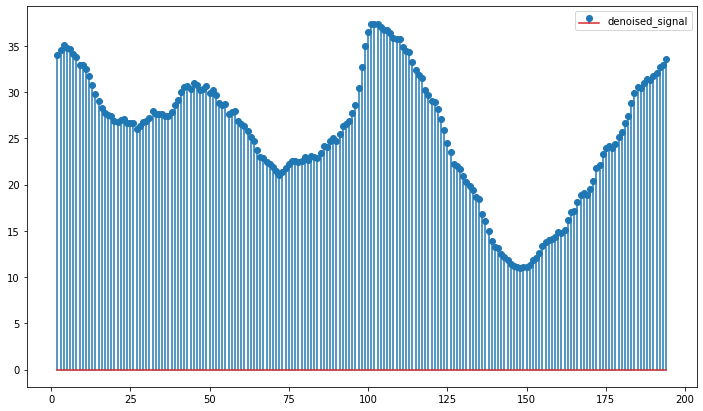

In [ ]:
denoised_signal_1=denoising(np.array(data['y[n]']))     #denoised_signal_1 is storing the output signal values after passing y[n] of the given data.csv into denosing function defined above
answers=dtft(denoised_signal_1)                    #answers is a list that is storing  denoised_signal_1(e^jw),h(e^jw),denoised_signal_1(e^jw)/h(e^jw)    
denoised_signal_1_jw=answers[0]
h_jw=answers[1]
deblurred_jw_1=answers[2]
x_1n=ift(deblurred_jw_1)    # x_1n is storing Inverse FT of denoised_signal_1(e^jw)/h(e^jw)
 
 
x = np.linspace(2, 194,193)      
plt.figure(figsize=(12,7))                                                             #plotting denoised signal 
plt.stem(x,denoised_signal_1, linefmt=None, markerfmt=None, basefmt=None,label='denoised_signal')

plt.legend()
plt.show() 


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


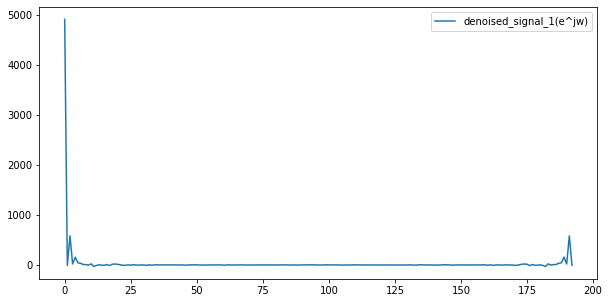

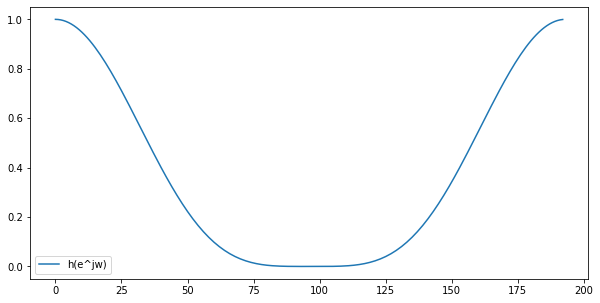

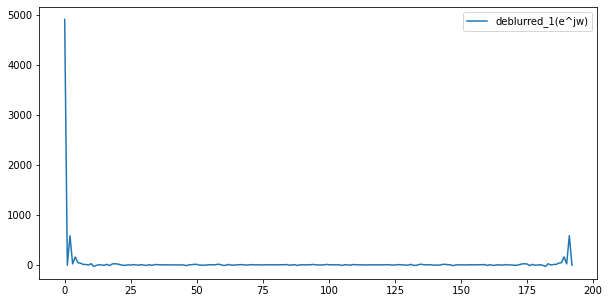

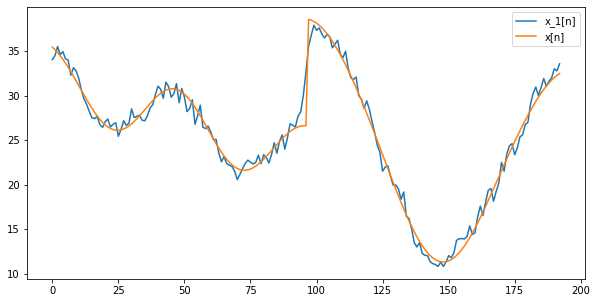

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(denoised_signal_1_jw,label='denoised_signal_1(e^jw)')    #plotting denoised_signal_1(e^jw)
plt.legend()
plt.show() 

plt.figure(figsize=(10,5))
plt.plot(h_jw,label='h(e^jw)')                                     #plotting h(e^jw)
plt.legend()
plt.show() 

plt.figure(figsize=(10,5))
plt.plot(deblurred_jw_1,label='deblurred_1(e^jw)')                 #plotting deblurred_jw_1(e^jw)
plt.legend()
plt.show() 


plt.figure(figsize=(10,5))
plt.plot(x_1n,label='x_1[n]')
plt.plot(data['x[n]'],label='x[n]')                      #plotting x_1n and x[n] together
plt.legend()
plt.show() 

#Method-2 Deblurring first then denosing

In [ ]:
answers=dtft(data['y[n]'])                    #answers is a list that is storing  y(e^jw),h(e^jw),deblurred(e^jw)/h(e^jw)    
y_jw=answers[0]
h_jw=answers[1]
deblurred_jw_2=answers[2]
deblurred_2=ift(deblurred_jw_2)    # deblurred_2 is storing inverse FFt of deblurred(e^jw)/h(e^jw)
x_2n=denoising(np.array(deblurred_2))     #x_2n is denoised version of deblurred_2

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


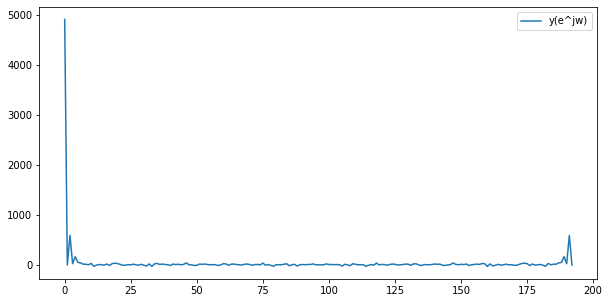

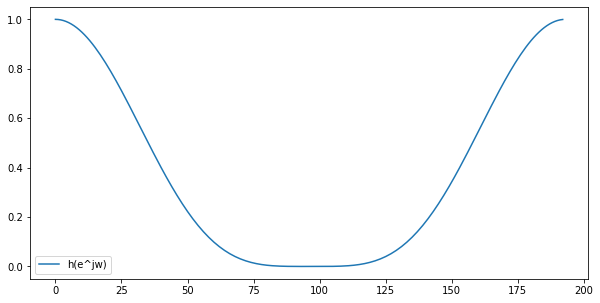

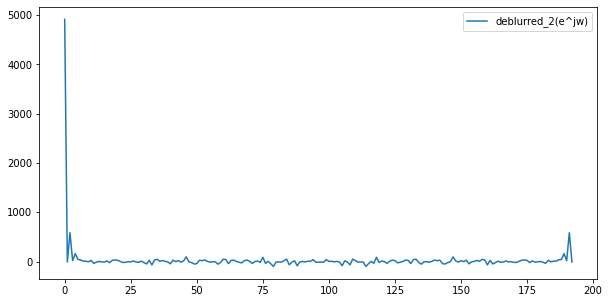

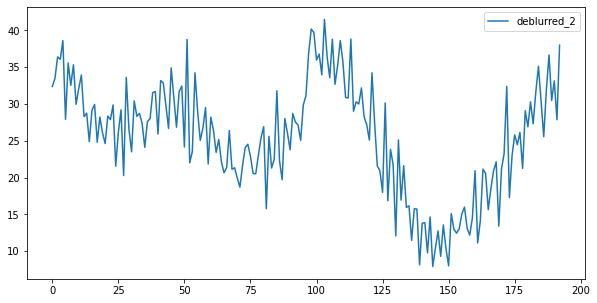

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


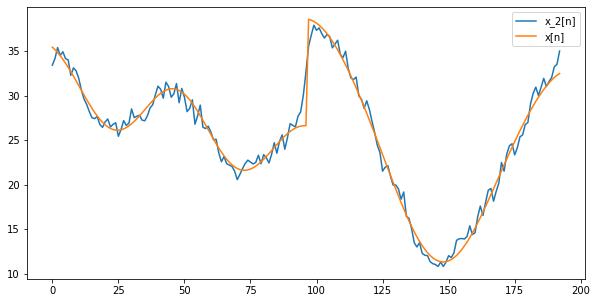

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_jw,label='y(e^jw)')                           #plotting y(e^jw) 
plt.legend()
plt.show() 

plt.figure(figsize=(10,5))
plt.plot(h_jw,label='h(e^jw)')                          #plotting h(e^jw)
plt.legend()
plt.show() 

plt.figure(figsize=(10,5))
plt.plot(deblurred_jw_2,label='deblurred_2(e^jw)')          #plotting deblurred(e^jw)
plt.legend()
plt.show() 

plt.figure(figsize=(10,5))
plt.plot(deblurred_2,label='deblurred_2')               #plottting deblurred signal
plt.legend()
plt.show() 


plt.figure(figsize=(10,5))
plt.plot(x_2n,label='x_2[n]')                       #plottibg x2[n]  and x[n] together 
plt.plot(data['x[n]'],label='x[n]')
plt.legend()
plt.show() 

In [ ]:
MSE = 0                                          #mean square error
for i in range(193):
    MSE +=(x_1n[i]-data['x[n]'][i])**2             #calculating MSE for x_1n
MSE = MSE/193
print("MSE(x_1[n]) =",MSE.real)
MSE = 0
for i in range(193):
    MSE +=(x_2n[i]-data['x[n]'][i])**2            #calculating MSE for x_2n
MSE = MSE/193
print("MSE(x_2[n]) =",MSE.real)



#less the MSE means better the signal hence method 1 is giving better results

MSE(x_1[n]) = 0.9330448260500126
MSE(x_2[n]) = 0.9823025357392471
